### DSPT6 - Adding Data Science to a Web Application

The purpose of this notebook is to demonstrate:
- Simple online analysis of data from a user of the Twitoff app or an API
- Train a more complicated offline model, and serialize the results for online use

In [25]:
import sqlite3
import pickle
import pandas as pd

In [26]:
# Connect to sqlite database
conn = sqlite3.connect('/Users/iskanderrakhman/Desktop/twitoff.sqlite3')

In [27]:
def get_data(query, conn):
    '''Function to get data from SQLite DB'''
    
    cursor = conn.cursor()
    result = cursor.execute(query).fetchall()

    # Get columns from cursor object
    columns = list(map(lambda x: x[0], cursor.description))

    # Assign to DataFrame
    df = pd.DataFrame(data=result, columns=columns)
    return df

In [28]:
import pickle

sql = '''
SELECT 
	tweet.id,
	tweet.tweet, 
	tweet.embedding,
	user.username
FROM tweet
JOIN user on tweet.user_id = user.id;
'''
df = get_data(sql, conn)
df['embeddding_decoded'] = df.embedding.apply(lambda x: pickle.loads(x))
print(df.shape)
df.head(2)

(12291, 5)


,id,tweet,embedding,username,embeddding_decoded
0,23048456524,"Worth a read, I liked this Economist article a...",b'\x80\x04\x95\xee\x11\x00\x00\x00\x00\x00\x00...,billgates,"[-0.07537176, 0.27606362, -0.0547825, 0.014415..."
1,23048600560,"Another interesting article, this one on a pro...",b'\x80\x04\x95\xee\x11\x00\x00\x00\x00\x00\x00...,billgates,"[-0.14114963, 0.17626844, -0.18227336, 0.10240..."


In [29]:


df.username.value_counts()

billgates      2889
barackobama    2766
jimmyfallon    2353
KingJames      2193
nasa           1693
elonmusk        397
Name: username, dtype: int64

In [35]:
import numpy as np
user1_embeddings = df.embeddding_decoded[df.username=='barackobama']
user2_embeddings = df.embeddding_decoded[df.username=='jimmyfallon']
embeddings = pd.concat([user1_embeddings, user2_embeddings])

embeddings_df = pd.DataFrame(embeddings.to_list(),
                             columns=[f'dom{i}' for i in range(300)])
labels = np.concatenate([np.ones(len(user1_embeddings)),
                         np.zeros(len(user2_embeddings))])
print(embeddings_df.shape, labels.shape)

(5119, 300) (5119,)


In [62]:
user1_embeddings.dtype

dtype(&#39;O&#39;)

In [50]:
user2_embeddings.head(5)

5275    [-0.09213637, 0.27691647, -0.034675717, -0.079...
5276    [-0.130815, 0.30606428, 0.040006865, -0.118154...
5277    [-0.014565929, 0.11254401, -0.1943647, -0.3019...
5278    [0.013256003, 0.030853337, 0.058401663, -0.150...
5279    [-0.031061132, 0.2504909, -0.23214899, -0.0930...
Name: embeddding_decoded, dtype: object

In [59]:
embeddings

1445     [-0.071493745, 0.19407812, 0.06623745, -0.0713...
1447     [-0.013151662, 0.21203065, -0.11749882, -0.050...
1449     [0.011794197, 0.0465238, -0.024731796, 0.00268...
1452     [-0.090474546, 0.19476354, -0.16456121, -0.007...
1453     [-0.06518261, 0.20626093, -0.09862618, -0.1259...
                               ...                        
12270    [0.018320816, 0.122861534, -0.19263135, -0.104...
12273    [-0.1443995, 0.27968413, 0.098179854, -0.07720...
12274    [-0.102248915, 0.1608561, 0.01813373, -0.00091...
12275    [0.012228434, 0.20730716, -0.13407743, -0.0834...
12278    [-0.018156001, 0.029746672, -0.035773333, 0.05...
Name: embeddding_decoded, Length: 5119, dtype: object

In [57]:
embeddings.to_list()

6589052,
  -0.019429578,
  -0.021462621,
  -0.00691479,
  -0.0030632615,
  -0.011425479,
  0.029650265,
  0.06750268,
  0.0045731845,
  -0.03388996,
  -0.03770237,
  0.015623105,
  -0.02247544,
  0.068775415,
  0.07621995,
  0.039412316,
  -0.090287246,
  -0.033151634,
  0.049376473,
  -0.08989481,
  0.030748472,
  0.09858289,
  0.021856891,
  0.06589478,
  0.11515722,
  0.10736194,
  -0.08764379,
  0.024175052,
  -0.1682139,
  -0.04581663,
  0.006476548,
  0.29683524,
  -0.07449526,
  0.12798159,
  -0.15524651,
  0.09112279,
  0.13859905,
  0.12461332,
  0.03852726,
  -0.027101893,
  0.17647585,
  -0.13609326,
  0.03326969,
  -0.012514212,
  0.09546584,
  0.0064075305,
  -0.09471526,
  -0.024803689,
  0.018721633,
  -0.12720552,
  0.024234684,
  0.1280869,
  -0.08568368,
  0.10917726,
  -0.095858276,
  0.091047205,
  0.1030406,
  0.04585805,
  -0.12041993,
  0.038454417,
  -0.01172587,
  -0.03301542,
  0.050881892,
  0.07175179,
  0.11078774,
  0.0908511,
  0.029261736,
  0.17215937,


In [53]:
embeddings_df.head(2)


,dom0,dom1,dom2,dom3,dom4,dom5,dom6,dom7,dom8,dom9,...,dom290,dom291,dom292,dom293,dom294,dom295,dom296,dom297,dom298,dom299
0,-0.071494,0.194078,0.066237,-0.071364,0.079229,-0.09992,-0.032685,-0.066482,0.013033,1.873975,...,0.038900,-0.016043,-0.137447,-0.009037,0.001932,0.034721,-0.014874,-0.073578,-0.226183,0.096248
1,-0.013152,0.212031,-0.117499,-0.050993,0.194784,-0.02574,0.069030,-0.071037,-0.031749,1.952614,...,-0.052333,0.062252,-0.012538,0.101256,0.062067,-0.097847,0.059537,0.026889,-0.192832,0.009060


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings_df, labels, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape)



(3839, 300) (1280, 300)


In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)




LogisticRegression(max_iter=1000)

In [39]:
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = log_reg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       564
         1.0       0.96      0.96      0.96       716

    accuracy                           0.95      1280
   macro avg       0.95      0.95      0.95      1280
weighted avg       0.95      0.95      0.95      1280



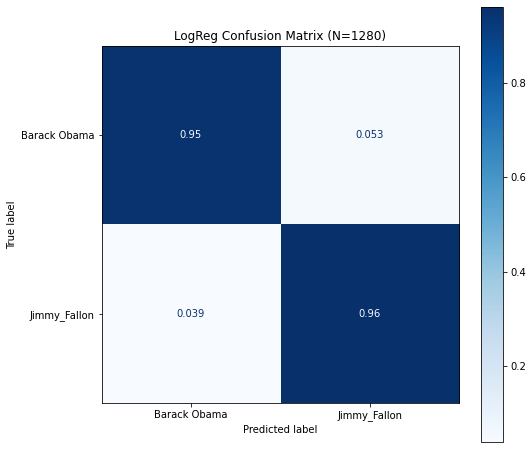

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(log_reg, X_test, y_test, 
                      normalize='true', cmap='Blues', 
                      display_labels=['Barack Obama', 'Jimmy_Fallon'], ax=ax)
plt.title(f'LogReg Confusion Matrix (N={X_test.shape[0]})');

In [41]:
import spacy

nlp = spacy.load('en_core_web_md', disable=['tagger', 'parser'])

def vectorize_tweet(nlp, tweet_text):
    return nlp(tweet_text).vector

In [42]:
new_embedding = vectorize_tweet(nlp, "Innovation displayed during this pandemic is unprecedented")
new_embedding[0:5]

array([-0.1844747 ,  0.33337143,  0.2668423 , -0.04272043, -0.09942528],
      dtype=float32)

In [43]:
log_reg.predict([new_embedding])

array([1.])

In [44]:
pickle.dump(log_reg, open("../models/log_reg.pkl","wb"))

In [45]:
unpickled_lr = pickle.load(open("../models/log_reg.pkl", "rb"))
unpickled_lr.predict([new_embedding])

array([1.])